In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [37]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [38]:
df_train['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

# Doing some EDA

### Checking how many booked and how many canceled

<AxesSubplot: xlabel='booking_status', ylabel='count'>

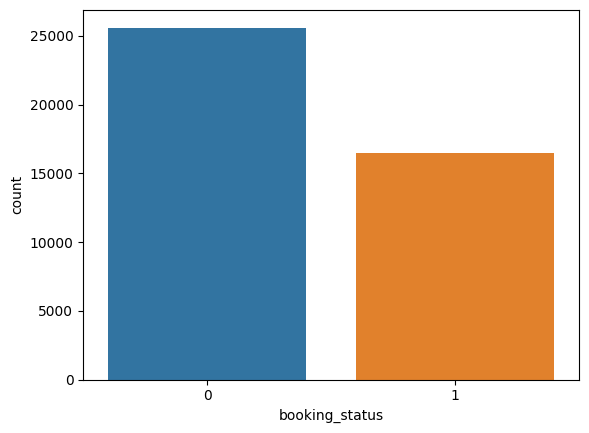

In [39]:
sns.countplot(x=df_train['booking_status'])

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

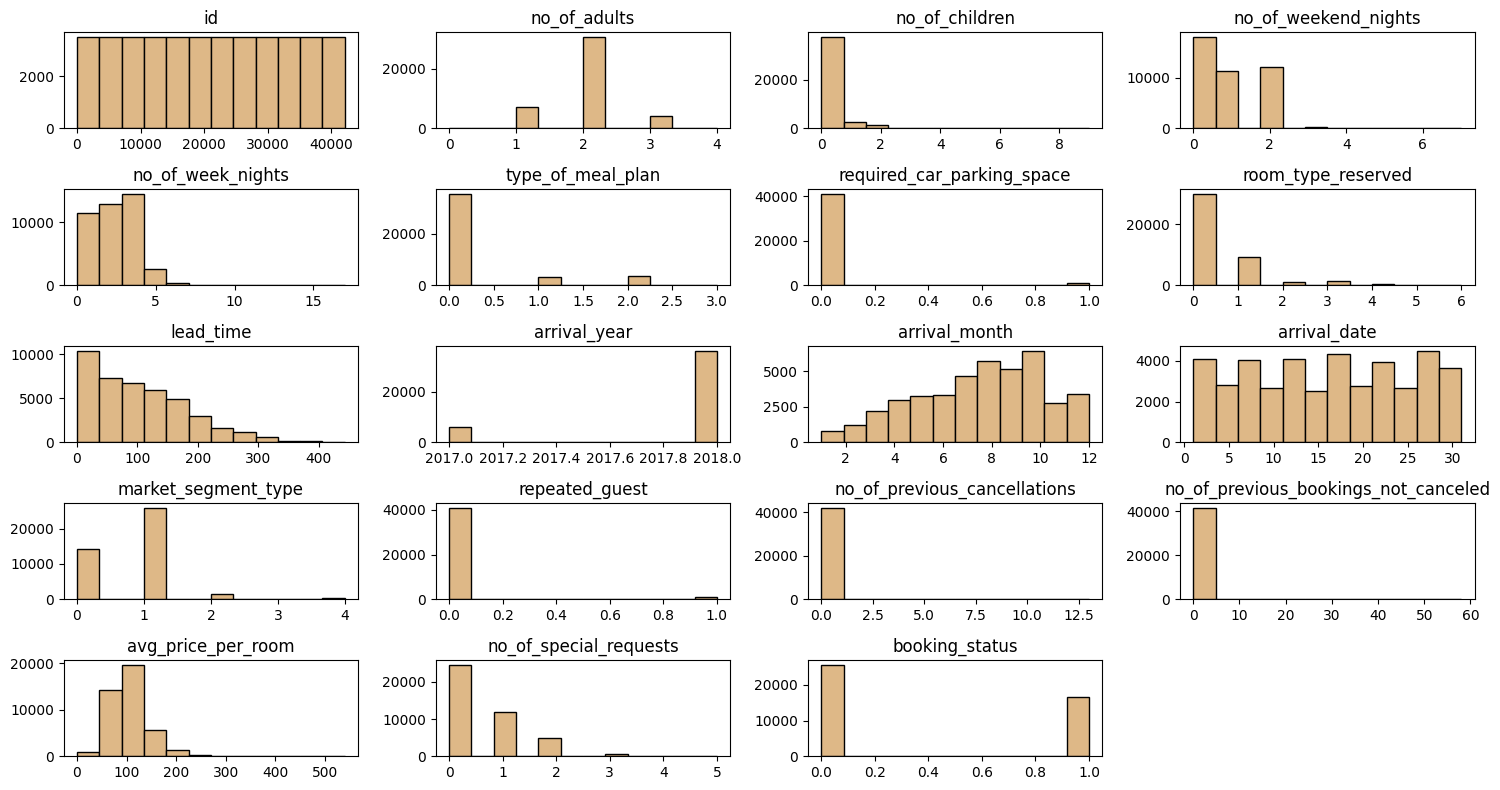

In [41]:
df_train.hist(grid=False,figsize=(15,8), bins=12, color='burlywood',edgecolor='black',linewidth=1.0)
plt.tight_layout(rect=(0, 0, 1, 1))   

<AxesSubplot: xlabel='repeated_guest', ylabel='count'>

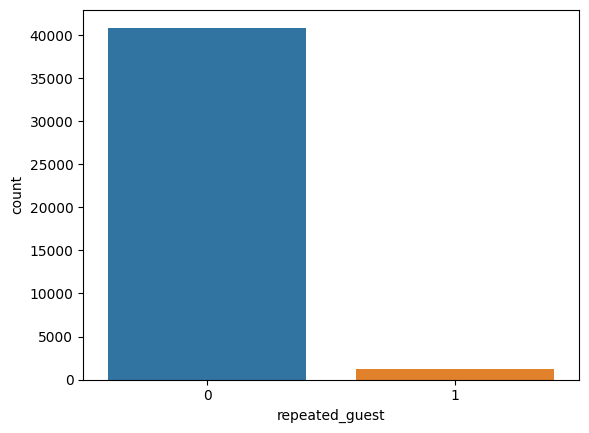

In [42]:
sns.countplot(x=df_train['repeated_guest'])

In [43]:
df_corr = df_train.corr()

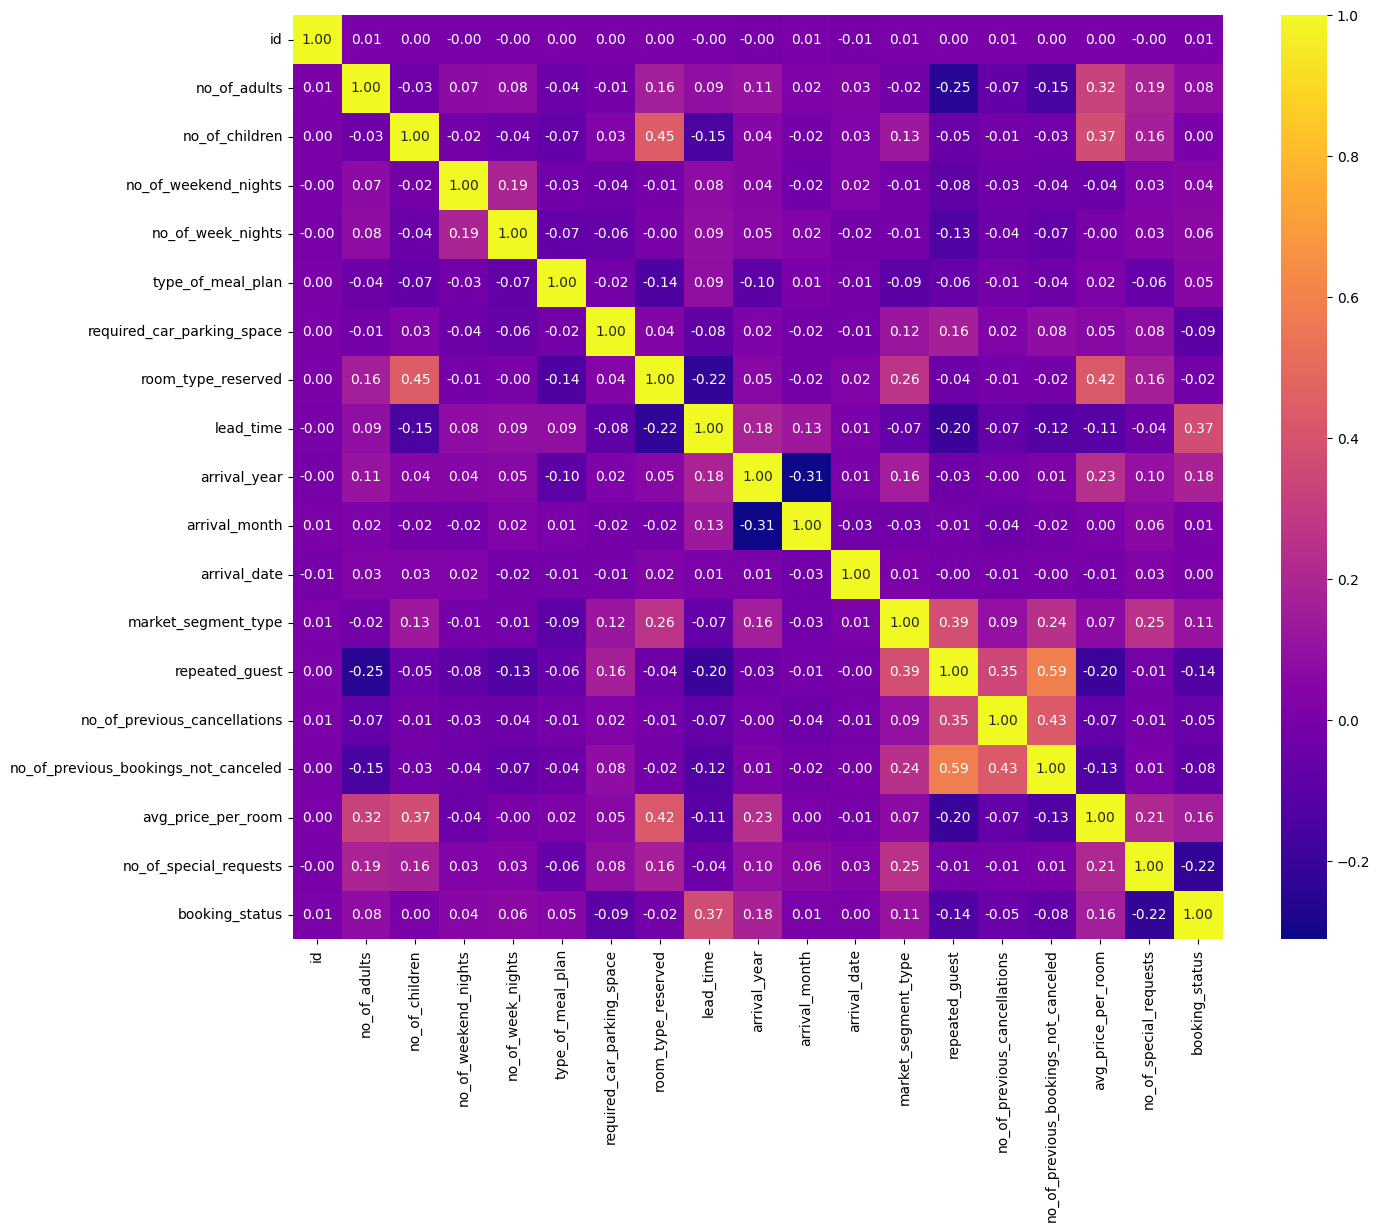

In [44]:
fig = plt.figure(figsize=(15,12))
fig = sns.heatmap(data=df_corr,cmap='plasma',annot=True, fmt=".2f")

Text(0.5, 1.0, 'Number of arriver per month (and year)')

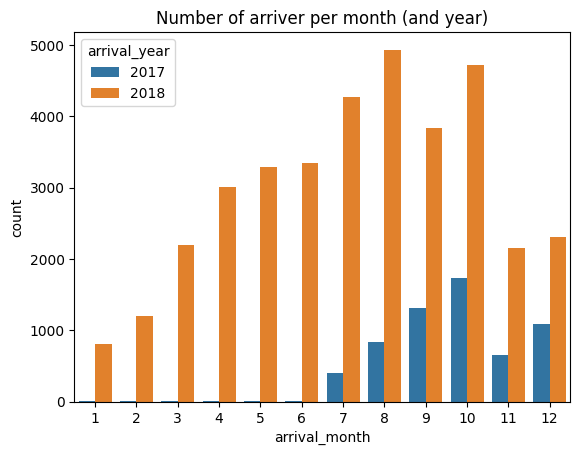

In [45]:
sns.countplot(x=df_train['arrival_month'],hue=df_train['arrival_year'])
plt.title('Number of arriver per month (and year)')

<AxesSubplot: xlabel='no_of_adults', ylabel='count'>

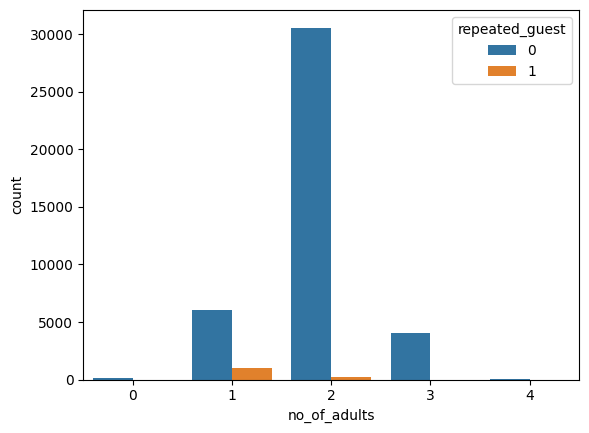

In [46]:
sns.countplot(x=df_train['no_of_adults'],hue=df_train['repeated_guest'])

<AxesSubplot: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

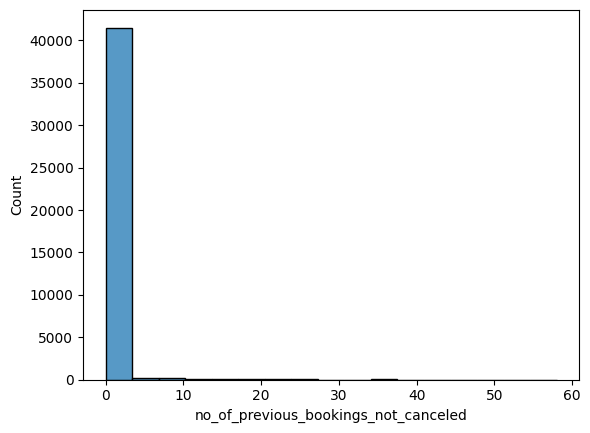

In [47]:
sns.histplot(x=df_train['no_of_previous_bookings_not_canceled'])
# df_train['no_of_previous_bookings_not_canceled'].value_counts()

In [48]:
df_train.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<AxesSubplot: xlabel='no_of_children', ylabel='room_type_reserved'>

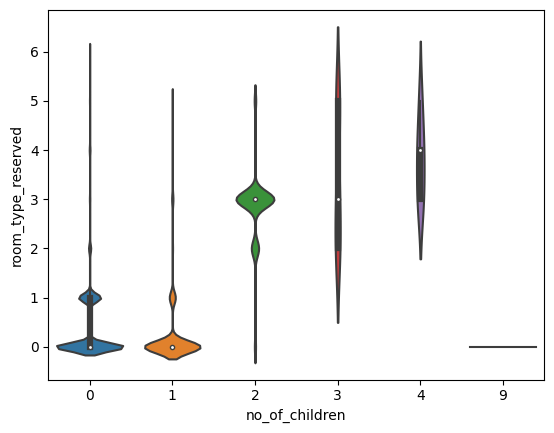

In [49]:
# sns.scatterplot(x=df_train['room_type_reserved'],y=df_train['no_of_children'])
# a.map(plt.bar)
sns.violinplot(x=df_train['no_of_children'],y=df_train['room_type_reserved'])

# Preprocessing stage

In [50]:
# df_train.drop('id',axis=1,inplace=True)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

import xgboost as xgb


In [52]:
df_train.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [53]:
X = df_train.drop('booking_status',axis=1)
y = df_train['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [54]:
for i in [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(n_neighbors=2), xgb.XGBClassifier()]:
    pipeline = Pipeline(steps=[('scale', StandardScaler()),('classifier', i)])
    pipeline.fit(X_train,y_train)
    print(f'{i} score: {pipeline.score(X_test,y_test)}')



DecisionTreeClassifier() score: 0.746437054631829
RandomForestClassifier() score: 0.8048693586698338
LogisticRegression() score: 0.7598574821852732
KNeighborsClassifier(n_neighbors=2) score: 0.7225653206650832
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) score: 0.816270783847981


In [64]:
param_grid = { 
    'classifier__max_depth': [2, 3, 5, 7, 10, 12],
    'classifier__n_estimators': [80, 100, 120],
}
pipeline_xgb = Pipeline(steps=[('scale', MinMaxScaler()),('classifier', xgb.XGBClassifier())])

grid = GridSearchCV(pipeline_xgb, param_grid=param_grid, cv=5,n_jobs=1,scoring='roc_auc')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_typ...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=1,
             param_grid={'classifier__max_depth': [2, 3, 5, 7, 10, 12],
                         'classifier__n_estimators': [80, 100, 120]},
             scoring='roc_auc')

In [65]:
print(grid.best_score_)
print(grid.best_params_)

0.8943149266098486
{'classifier__max_depth': 5, 'classifier__n_estimators': 80}


array([0.9256551 , 0.8645356 , 0.6794499 , ..., 0.93788147, 0.51099014,
       0.9324428 ], dtype=float32)

In [76]:
preds =  grid.predict_proba(df_test)
preds = np.max(preds,axis=1)
output = pd.DataFrame({'id': df_test['id'], 'booking_status': preds})
output.to_csv('submission.csv', index=False)

0.8933999588873469